# Data Preprocessing Test

Used in the beginning by B.A.K. to inspect the data, optimize the moving window RMS window size, the silence threshold, and the plotting parameters.

Can generate one sequence filled with only non-silence from one recording.

Notes:

The silence threshold defined here is higher than the one used in the actual generation, since optimizations inbetween allowed us to use higher thresholds without losing data.

Very memory inefficient.

In [1]:
import sounddevice as sd
import soundfile as sf
import soundfile as sf
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def getIndex(samplerate, seconds=0, minutes=0, hours=0):
    return samplerate*(seconds + minutes*60 + hours*3600)

In [3]:
def getTime(samplerate, index):
    s_idx = index / samplerate
    hours = s_idx // 3600
    minutes = (s_idx - hours*3600) // 60
    seconds = (s_idx - hours*3600 - minutes * 60)
    return [hours, minutes, seconds]

In [4]:
# Load the data

fs = 24000
window_size = 256
overlap = 0.875
noverlap = int(np.floor(window_size * overlap))
print(noverlap)

file_num = 11

filenm = f'/home/bukaya/ethz/ns/b8p2male-b10o15female_aligned/2018-08-14/b8p2male-b10o15female_{file_num}_SdrChannels.w64'
strength_filenm = f'/home/bukaya/ethz/ns/b8p2male-b10o15female_aligned/2018-08-14/b8p2male-b10o15female_{file_num}_SdrChannels.w64'

224


In [5]:
with open(filenm, 'rb') as f:  
    Audiodata, _samplerate_bad = sf.read(f)
    
mic  = Audiodata[:, 0]
acc_m = Audiodata[:, 1]
acc_f = Audiodata[:, 2]

In [6]:
# Apply Bandpass filter

sos = signal.butter(10, [15, 8000], 'bp', fs=24000, output='sos')
filtered_bp = signal.sosfilt(sos, mic)
#sf.write('/home/bukaya/ethz/ns/vocal-recon/mic11_butterworth_bp_10_15_8000.w64', filtered_bp, fs)

In [7]:
# Take moving window RMS

window = 2400
abs_fil = np.absolute(filtered_bp)
mean_pd_abs = pd.Series(abs_fil).rolling(window=window).mean().iloc[window-1:].values
#plt.plot(mean_pd_abs)

In [8]:
# Extract non-silence from all channels

counter = 0

mic_bp_sht = []
acc_m_sht = []
acc_f_sht = []

for i, j in enumerate(mean_pd_abs):
    if j >= 0.001:
        mic_bp_sht.append(filtered_bp[i + window//2])
        acc_m_sht.append(acc_m[i + window//2])
        acc_f_sht.append(acc_f[i + window//2])
        counter += 1
        
print(counter)
mic_bp_np = np.asarray(mic_bp_sht)
acc_m_np = np.asarray(acc_m_sht)
acc_f_np = np.asarray(acc_f_sht)
'''sf.write(f'/home/bukaya/ethz/ns/vocal-recon/{file_num}_short_{window}_mic.w64', mic_bp_np, fs)
sf.write(f'/home/bukaya/ethz/ns/vocal-recon/{file_num}_short_{window}_acc_m.w64', acc_m_np, fs)
sf.write(f'/home/bukaya/ethz/ns/vocal-recon/{file_num}_short_{window}_acc_f.w64', acc_f_np, fs)'''

63602401


"sf.write(f'/home/bukaya/ethz/ns/vocal-recon/{file_num}_short_{window}_mic.w64', mic_bp_np, fs)\nsf.write(f'/home/bukaya/ethz/ns/vocal-recon/{file_num}_short_{window}_acc_m.w64', acc_m_np, fs)\nsf.write(f'/home/bukaya/ethz/ns/vocal-recon/{file_num}_short_{window}_acc_f.w64', acc_f_np, fs)"

In [ ]:
# Plot the spectogram of a slice of data

window_size = 240
slc = slice(0, 96000)
#slc = slice(8*fs,10*fs)
print(mic_bp_np.shape)


plt.rcParams["figure.figsize"] = [10,8]

f_mic, t_mic, Sxx_mic = signal.spectrogram(mic_bp_np[slc], fs , window=signal.hann(window_size, sym=False) , #window=signal.blackman(self.window_size),
                                nfft=window_size, noverlap=noverlap, scaling="spectrum")
fig, axs = plt.subplots(3, 1, sharex=True)

axs[0].pcolormesh(t_mic, f_mic[:81], np.log10(0.00000001 + Sxx_mic[:81,:]))

f_acc_f, t_acc_f, Sxx_acc_f = signal.spectrogram(acc_f_np[slc], fs , window=signal.hann(window_size, sym=False) , #window=signal.blackman(self.window_size),
                                nfft=window_size, noverlap=noverlap, scaling="spectrum")
axs[2].pcolormesh(t_acc_f, f_acc_f[:81], np.log10(0.00000001 + Sxx_acc_f[:81,:]))

f_acc_m, t_acc_m, Sxx_acc_m = signal.spectrogram(acc_m_np[slc], fs , window=signal.hann(window_size, sym=False) , #window=signal.blackman(self.window_size),
                                nfft=window_size, noverlap=noverlap, scaling="spectrum")
axs[1].pcolormesh(t_acc_m, f_acc_m[:81], np.log10(0.00000001 + Sxx_acc_m[:81,:]))


axs[0].set_ylabel('mic')
axs[1].set_ylabel('acc_m')
axs[2].set_ylabel('acc_f')


plt.xlabel('Time (s)')

axs[1].set_ylabel('Frequency (Hz)\nacc_m')

fig.suptitle(f'Recording 11 Silence removed')

plt.savefig('nonsilence.png',bbox_inches='tight' )

In [74]:
f_mic

array([    0.,   100.,   200.,   300.,   400.,   500.,   600.,   700.,
         800.,   900.,  1000.,  1100.,  1200.,  1300.,  1400.,  1500.,
        1600.,  1700.,  1800.,  1900.,  2000.,  2100.,  2200.,  2300.,
        2400.,  2500.,  2600.,  2700.,  2800.,  2900.,  3000.,  3100.,
        3200.,  3300.,  3400.,  3500.,  3600.,  3700.,  3800.,  3900.,
        4000.,  4100.,  4200.,  4300.,  4400.,  4500.,  4600.,  4700.,
        4800.,  4900.,  5000.,  5100.,  5200.,  5300.,  5400.,  5500.,
        5600.,  5700.,  5800.,  5900.,  6000.,  6100.,  6200.,  6300.,
        6400.,  6500.,  6600.,  6700.,  6800.,  6900.,  7000.,  7100.,
        7200.,  7300.,  7400.,  7500.,  7600.,  7700.,  7800.,  7900.,
        8000.,  8100.,  8200.,  8300.,  8400.,  8500.,  8600.,  8700.,
        8800.,  8900.,  9000.,  9100.,  9200.,  9300.,  9400.,  9500.,
        9600.,  9700.,  9800.,  9900., 10000., 10100., 10200., 10300.,
       10400., 10500., 10600., 10700., 10800., 10900., 11000., 11100.,
      

In [75]:
t_mic

array([0.005     , 0.00566667, 0.00633333, 0.007     , 0.00766667,
       0.00833333, 0.009     , 0.00966667, 0.01033333, 0.011     ,
       0.01166667, 0.01233333, 0.013     , 0.01366667, 0.01433333,
       0.015     , 0.01566667, 0.01633333, 0.017     , 0.01766667,
       0.01833333, 0.019     , 0.01966667, 0.02033333, 0.021     ,
       0.02166667, 0.02233333, 0.023     , 0.02366667, 0.02433333,
       0.025     , 0.02566667, 0.02633333, 0.027     , 0.02766667,
       0.02833333, 0.029     , 0.02966667, 0.03033333, 0.031     ,
       0.03166667, 0.03233333, 0.033     , 0.03366667, 0.03433333,
       0.035     , 0.03566667, 0.03633333, 0.037     , 0.03766667,
       0.03833333, 0.039     , 0.03966667, 0.04033333, 0.041     ,
       0.04166667, 0.04233333, 0.043     , 0.04366667, 0.04433333,
       0.045     , 0.04566667, 0.04633333, 0.047     , 0.04766667,
       0.04833333, 0.049     , 0.04966667, 0.05033333, 0.051     ,
       0.05166667, 0.05233333, 0.053     , 0.05366667, 0.05433

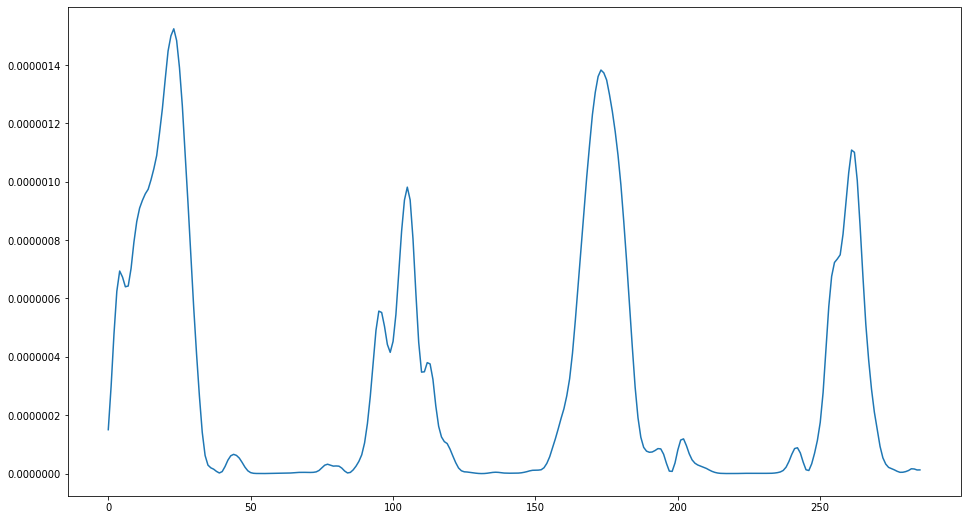

In [76]:
plt.plot(Sxx_mic[40,:])